In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
import random
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np
import json
import time

In [12]:
# set seed to reproducible
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np
import json
import itertools
from scipy.interpolate import griddata
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3


In [13]:
class Landscape2d():
    def __init__(self, num_dimensions, dimension_size, num_grid_res=7, assigned_fitness=[]):
        self.num_dims = num_dimensions
        self.dim_size = dimension_size
        self.num_grid_res = num_grid_res
        self.chosen_points = self.gen_chosen_points()
        self.assigned_fitness = assigned_fitness
        self.fitness_grid = self.gen_2d_landscape()

    def gen_chosen_points(self):
        k = complex(0, self.num_grid_res)
        grid_x, grid_y = np.mgrid[0:self.dim_size:k, 0:self.dim_size:k]
        return np.vstack((grid_x.ravel(), grid_y.ravel())).T

    def uniform_rand_fit_assign(self, min=1, max=100):
        num_rand_points = self.chosen_points.shape[0]
        rand_fitness_array = np.random.random_integers(min, max, num_rand_points)
        return rand_fitness_array

    def gen_2d_landscape(self):
        if self.assigned_fitness == []:
            self.assigned_fitness = self.uniform_rand_fit_assign()
        grid_x, grid_y = np.mgrid[0:self.dim_size, 0:self.dim_size]
        spline = sp.interpolate.Rbf(self.chosen_points[:,0],self.chosen_points[:,1],self.assigned_fitness,function='cubic')
        return spline(grid_x, grid_y)

    def draw_2d_in_3d(self, elevation_deg=80, rotation_deg=-90):
        grid_x, grid_y = np.mgrid[0:self.dim_size, 0:self.dim_size]
        fig = p.figure()
        ax = p3.Axes3D(fig)
        # ax.plot_wireframe(grid_x,grid_y,self.fitness_grid, color = 'black')
        ax.contour3D(grid_x, grid_y, self.fitness_grid, 50, cmap=plt.cm.viridis)
        ax.set_xlabel('loci_0')
        ax.set_ylabel('loci_1')
        ax.set_zlabel('Fitness')
        ax.view_init(elevation_deg, rotation_deg)
        p.show()

    def draw_2d(self):
        plt.plot(self.chosen_points[:, 0], self.chosen_points[:, 1], 'k.', ms=10)
        plt.imshow(self.fitness_grid.T, extent=(0, self.dim_size, 0, self.dim_size), origin='lower')
        plt.title('Cubic')
        plt.xlabel('loci 0')
        plt.ylabel('loci 1')
        plt.gcf().set_size_inches(10, 10)
        plt.show()



In [14]:
class Landscape3d():
    def __init__(self, num_dimensions, dimension_size, num_grid_res=7, assigned_fitness=[]):
        self.num_dims = num_dimensions
        self.dim_size = dimension_size
        self.num_grid_res = num_grid_res
        self.chosen_points = self.gen_chosen_points()
        self.assigned_fitness = assigned_fitness
        self.fitness_grid = self.gen_landscape()

    def gen_chosen_points(self):
        k = complex(0, self.num_grid_res)
        grid_x, grid_y, grid_z = np.mgrid[0:self.dim_size:k, 0:self.dim_size:k, 0:self.dim_size:k]
        return np.vstack((grid_x.ravel(), grid_y.ravel(), grid_z.ravel())).T

    def uniform_rand_fit_assign(self, min=1, max=100):
        num_rand_points = self.chosen_points.shape[0]
        print('numb random points = ', num_rand_points)
        rand_fitness_array = np.random.random_integers(min, max, num_rand_points)
        return rand_fitness_array

    def gen_landscape(self):
        if self.assigned_fitness == []:
            self.assigned_fitness = self.uniform_rand_fit_assign()
        grid_x, grid_y, grid_z = np.mgrid[0:self.dim_size, 0:self.dim_size, 0:self.dim_size]
        spline = sp.interpolate.Rbf(self.chosen_points[:,0],self.chosen_points[:,1],
                                    self.chosen_points[:,2], self.assigned_fitness,function='cubic')
        return spline(grid_x, grid_y, grid_z)

    def draw_2d_in_3d(self, elevation_deg=80, rotation_deg=-90, fixed_z = 1):
        grid_x, grid_y = np.mgrid[0:self.dim_size, 0:self.dim_size]
        fig = p.figure()
        ax = p3.Axes3D(fig)
        # ax.plot_wireframe(grid_x,grid_y,self.fitness_grid, color = 'black')
        ax.contour3D(grid_x, grid_y, self.fitness_grid[:,:,fixed_z], 50, cmap=plt.cm.viridis)
        ax.set_xlabel('loci_0')
        ax.set_ylabel('loci_1')
        ax.set_zlabel('Fitness')
        ax.view_init(elevation_deg, rotation_deg)
        p.show()

In [5]:
land = Landscape3d(num_dimensions=3, dimension_size=30, num_grid_res=3)

numb random points =  27


/home/huawei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead


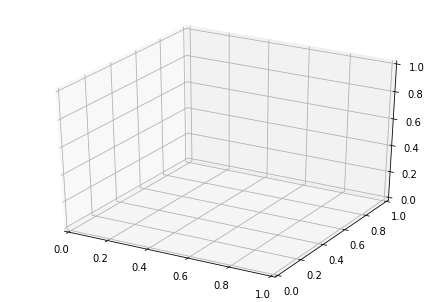

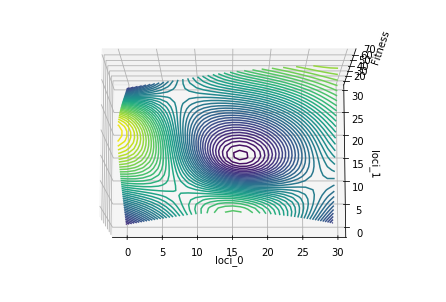

In [15]:
fig = p.figure()
ax = p3.Axes3D(fig)
def animate(frame):
    land.draw_2d_in_3d(fixed_z=frame)

frames=range(1,30, 1)
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=frames, repeat=True)